# Mod4/L4: Two-Sample Confidence Intervals for Means

## Introduction
In this lesson, we discuss confidence intervals for the difference in means from two different populations.

## Setup
- **Sample 1**: Size $n_1$, from $N(\mu_1, \sigma_1^2)$
- **Sample 2**: Size $n_2$, from $N(\mu_2, \sigma_2^2)$
- Assumptions:
  - Samples are independent
  - Both $\sigma_1^2$ and $\sigma_2^2$ are known

## Steps to Find Confidence Interval

### Step 1: Estimator
A natural estimator for $\mu_1 - \mu_2$ is $\bar{X}_1 - \bar{X}_2$:
$$ \bar{X}_1 = \frac{1}{n_1} \sum_{i=1}^{n_1} X_{1i} $$
$$ \bar{X}_2 = \frac{1}{n_2} \sum_{i=1}^{n_2} X_{2i} $$

### Step 2: Distribution of Estimator
- $\bar{X}_1 \sim N(\mu_1, \frac{\sigma_1^2}{n_1})$
- $\bar{X}_2 \sim N(\mu_2, \frac{\sigma_2^2}{n_2})$
- $\bar{X}_1 - \bar{X}_2 \sim N(\mu_1 - \mu_2, \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2})$

### Step 3: Standardization
Standardize the estimator to a Z-score:
$$ Z = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} \sim N(0,1) $$

### Step 4: Confidence Interval
For a $(1-\alpha)100\%$ confidence interval:
$$ (\bar{X}_1 - \bar{X}_2) \pm Z_{\alpha/2} \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}} $$

## Example
### Problem
- **Group 1**: 57 students, mean score = 77.2, variance = 15.3
- **Group 2**: 63 students, mean score = 75.3, variance = 19.7
- Find a 99% confidence interval for the difference in means.

### Solution
1. **Calculate Critical Value**:
   - For 99% CI, $\alpha = 0.01$
   - $Z_{\alpha/2} = Z_{0.005} = 2.58$

2. **Apply Formula**:
   $$ (\bar{X}_1 - \bar{X}_2) \pm 2.58 \sqrt{\frac{15.3}{57} + \frac{19.7}{63}} $$
   - Point estimate: $77.2 - 75.3 = 1.9$
   - Margin of error: $2.58 \times \sqrt{\frac{15.3}{57} + \frac{19.7}{63}} \approx 2.56 \times 0.73 \approx 1.96$
   - Confidence interval: $1.9 \pm 1.96 = (-0.06, 3.86)$

### Interpretation
The 99% confidence interval for the difference in means is (0.06, 3.86). Since the interval includes 0, it is plausible that the means are equal. 
Don't try to change the content  by changing the percentage of ${\alpha}$ as that would be tampering with the interpretation! 

## Conclusion
- Confidence intervals provide a range of plausible values for the difference in means.
- For large samples, normality is not required due to the Central Limit Theorem.
- For small samples, special considerations are needed, which will be discussed in the next lesson.

In [8]:
# Point estimate X_bar1 - X_bar2
pe <- 77.2 - 75.3
pe

z<-qnorm(0.995) # 0.995 quantile of standard normal distribution 2.575829
z

# point estimate + - the following
moe<-z * sqrt(15.3/57 + 19.7/63)
moe

pe - moe
pe + moe


[1] 1.9

[1] 2.575829

[1] 1.963585

[1] -0.06358539

[1] 3.863585

99% CI for μ₁ - μ₂: (-0.06, 3.86)


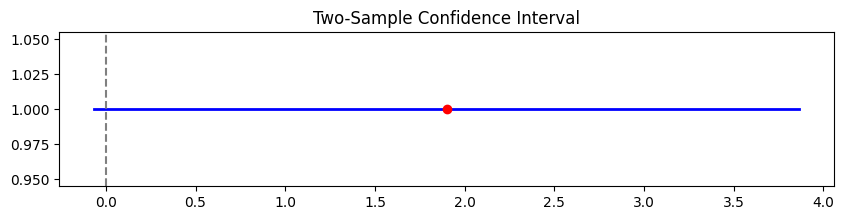

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def two_sample_ci(x1_bar, x2_bar, sigma1_sq, sigma2_sq, n1, n2, alpha=0.05):
    """Calculate two-sample confidence interval for difference in means"""
    z_crit = stats.norm.ppf(1 - alpha/2)
    point_est = x1_bar - x2_bar
    margin = z_crit * np.sqrt(sigma1_sq/n1 + sigma2_sq/n2)
    return (point_est - margin, point_est + margin)

# Example
x1_bar, x2_bar = 77.2, 75.3     # sample means
sigma1_sq, sigma2_sq = 15.3, 19.7  # variances 
n1, n2 = 57, 63                  # sample sizes
alpha = 0.01                     # 99% CI

ci = two_sample_ci(x1_bar, x2_bar, sigma1_sq, sigma2_sq, n1, n2, alpha)
print(f"99% CI for μ₁ - μ₂: ({ci[0]:.2f}, {ci[1]:.2f})")

# Visualize
def plot_ci(ci, point_est):
    plt.figure(figsize=(10, 2))
    plt.plot([ci[0], ci[1]], [1, 1], 'b-', linewidth=2)
    plt.plot(point_est, 1, 'ro')
    plt.axvline(x=0, color='gray', linestyle='--')
    plt.title('Two-Sample Confidence Interval')
    plt.show()

plot_ci(ci, x1_bar - x2_bar)